<ipython-input-1-d7a4da238129>:17: RuntimeWarning: overflow encountered in exp
  dxi_dt = (1 - 2 * states[i]) * (1 + np.exp(-zi / T))


Best State: [0 0 1 1 1 0 1 1 1 0]
Best Energy: -6


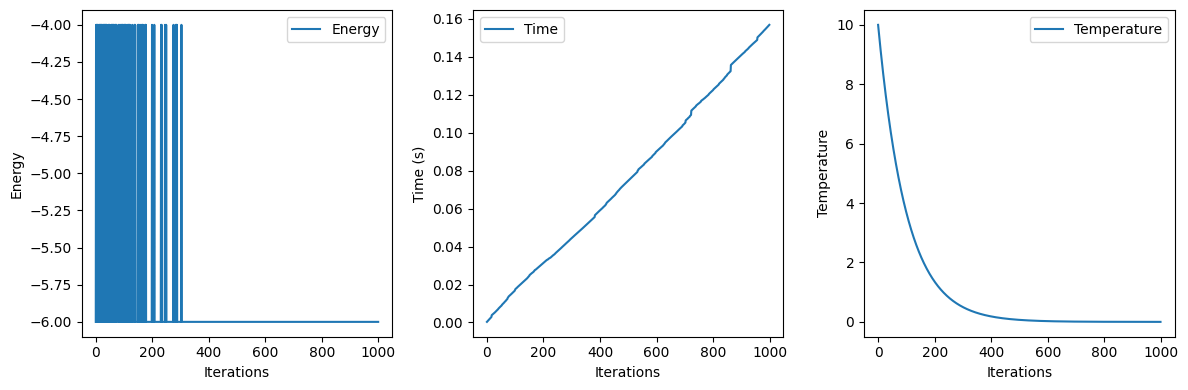

In [ ]:
#CBM implementation
import numpy as np
import time

# Function to calculate energy for a given state
def calculate_energy(state):
    return -np.sum(state)

# Function for chaotic Boltzmann machine state update
def update_state(states, internal_states, T):
    N = len(states)
    for i in range(N):
        # Calculate zi for the ith unit
        zi = np.dot(internal_states, states) - 0.5 * states[i]

        # Update internal state using the differential equation
        dxi_dt = (1 - 2 * states[i]) * (1 + np.exp(-zi / T))
        internal_states[i] += dxi_dt  # Increment by the change

        # Update state si based on xi reaching 0 or 1
        if internal_states[i] >= 1:
            states[i] = 1
            internal_states[i] = 0
        elif internal_states[i] <= 0:
            states[i] = 0
            internal_states[i] = 0
    return states, internal_states

# Simulated Annealing algorithm with chaotic Boltzmann machine
def simulated_annealing(initial_state, initial_internal_state, initial_temperature, cooling_rate, iterations):
    current_state = initial_state.copy()
    current_internal_state = initial_internal_state.copy()
    current_energy = calculate_energy(current_state)
    best_state = current_state.copy()
    best_energy = current_energy

    # Metrics
    energies = []
    times = []
    temperatures = []

    start_time = time.time()

    for i in range(iterations):
        temperature = initial_temperature * np.exp(-cooling_rate * i)

        # Update state using chaotic Boltzmann machine
        current_state, current_internal_state = update_state(current_state, current_internal_state, temperature)
        proposed_energy = calculate_energy(current_state)

        # Collect metrics
        energies.append(current_energy)
        times.append(time.time() - start_time)
        temperatures.append(temperature)

        # Decide whether to accept the new state
        if proposed_energy < current_energy or np.random.rand() < np.exp((current_energy - proposed_energy) / temperature):
            current_energy = proposed_energy
            if current_energy < best_energy:
                best_state = current_state.copy()
                best_energy = current_energy

    return best_state, best_energy, energies, times, temperatures

# Example usage:
# Initialize states and parameters
N = 10  # Number of units
initial_state = np.random.randint(0, 2, size=N)
initial_internal_state = np.random.rand(N)
initial_temperature = 10.0
cooling_rate = 0.01
iterations = 1000

# Perform simulated annealing with chaotic Boltzmann machine
best_state, best_energy, energies, times, temperatures = simulated_annealing(
    initial_state, initial_internal_state, initial_temperature, cooling_rate, iterations
)

# Display best solution found
print("Best State:", best_state)
print("Best Energy:", best_energy)

# Plot metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(energies, label="Energy")
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(times, label="Time")
plt.xlabel("Iterations")
plt.ylabel("Time (s)")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(temperatures, label="Temperature")
plt.xlabel("Iterations")
plt.ylabel("Temperature")
plt.legend()

plt.tight_layout()
plt.show()

Best State (Stochastic Ising Model): [1 1 1 1 1 1 1 1 1 1]
Best Energy (Stochastic Ising Model): -10

Best State (Chaotic Ising Model): [1 1 1 1 1 1 1 1 1 1]
Best Energy (Chaotic Ising Model): -10


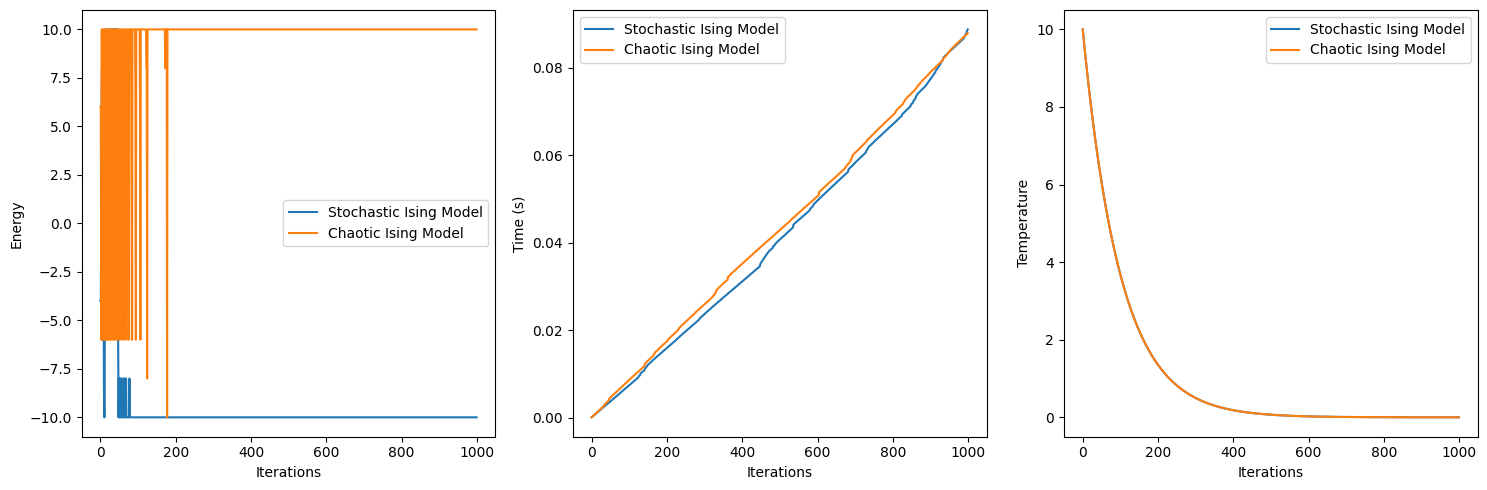

In [ ]:
#ising model first try
import numpy as np
import time
import matplotlib.pyplot as plt

# Function to calculate energy for a given state
def calculate_energy(state):
    return -np.sum(state)

# Function for stochastic Ising model state update
def update_state_stochastic(states, temperature):
    N = len(states)
    for i in range(N):
        energy_change = 2 * states[i] * np.sum(states)  # Energy change for flipping the spin
        if energy_change < 0 or np.random.rand() < np.exp(-energy_change / temperature):
            states[i] *= -1  # Flip the spin if the energy change is favorable or based on probability
    return states

# Function for chaotic Ising model state update
def update_state_chaotic(states, internal_states, temperature):
    N = len(states)
    for i in range(N):
        # Calculate xi based on chaotic dynamics
        dxi_dt = -states[i] * np.exp(1 / temperature * np.sum(states) - states[i] / temperature)
        internal_states[i] += dxi_dt  # Increment by the change

        # Update state si based on xi reaching 0 or 1
        if internal_states[i] >= 1:
            states[i] = 1
            internal_states[i] = 0
        elif internal_states[i] <= 0:
            states[i] = -1
            internal_states[i] = 0
    return states, internal_states

# Simulated Annealing algorithm with Ising models (stochastic and chaotic)
def simulated_annealing_ising(initial_state, initial_internal_state, initial_temperature, cooling_rate, iterations, is_chaotic=True):
    current_state = initial_state.copy()
    current_internal_state = initial_internal_state.copy() if is_chaotic else None
    current_energy = calculate_energy(current_state)
    best_state = current_state.copy()
    best_energy = current_energy

    # Metrics
    energies = []
    times = []
    temperatures = []

    start_time = time.time()

    for i in range(iterations):
        temperature = initial_temperature * np.exp(-cooling_rate * i)
        temperatures.append(temperature)

        if is_chaotic:
            # Update state using chaotic Ising model
            current_state, current_internal_state = update_state_chaotic(current_state, current_internal_state, temperature)
        else:
            # Update state using stochastic Ising model
            current_state = update_state_stochastic(current_state, temperature)

        # Calculate energy
        current_energy = calculate_energy(current_state)
        energies.append(current_energy)

        # Decide whether to accept the new state
        if current_energy < best_energy or np.random.rand() < np.exp((best_energy - current_energy) / temperature):
            best_energy = current_energy
            best_state = current_state.copy()

        times.append(time.time() - start_time)

    return best_state, best_energy, energies, times, temperatures

# Example usage:
# Initialize states and parameters
N = 10  # Number of units
initial_state = np.random.choice([-1, 1], size=N)
initial_internal_state = np.random.rand(N)  # Initial internal state for chaotic Ising model
initial_temperature = 10.0
cooling_rate = 0.01
iterations = 1000

# Perform simulated annealing with stochastic Ising model
best_state_stochastic, best_energy_stochastic, energies_stochastic, times_stochastic, temperatures_stochastic = simulated_annealing_ising(
    initial_state, None, initial_temperature, cooling_rate, iterations, is_chaotic=False
)

# Perform simulated annealing with chaotic Ising model
best_state_chaotic, best_energy_chaotic, energies_chaotic, times_chaotic, temperatures_chaotic = simulated_annealing_ising(
    initial_state, initial_internal_state, initial_temperature, cooling_rate, iterations, is_chaotic=True
)

# Display best solutions found
print("Best State (Stochastic Ising Model):", best_state_stochastic)
print("Best Energy (Stochastic Ising Model):", best_energy_stochastic)
print("\nBest State (Chaotic Ising Model):", best_state_chaotic)
print("Best Energy (Chaotic Ising Model):", best_energy_chaotic)

# Plot metrics
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(energies_stochastic, label="Stochastic Ising Model")
plt.plot(energies_chaotic, label="Chaotic Ising Model")
# plt.plot(energies, label="CBM Energy")
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(times_stochastic, label="Stochastic Ising Model")
plt.plot(times_chaotic, label="Chaotic Ising Model")
# plt.plot(times, label="CBM Time")
plt.xlabel("Iterations")
plt.ylabel("Time (s)")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(temperatures_stochastic, label="Stochastic Ising Model")
plt.plot(temperatures_chaotic, label="Chaotic Ising Model")
# plt.plot(temperatures, label="CBM Temperature")
plt.xlabel("Iterations")
plt.ylabel("Temperature")
plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-49-f1d0b41b1557>:18: RuntimeWarning: overflow encountered in exp
  dxi_dt = (1 - 2 * states[i]) * (1 + np.exp(-zi / T))
<ipython-input-49-f1d0b41b1557>:36: RuntimeWarning: overflow encountered in exp
  prob_v_given_h = 1 / (1 + np.exp(-(np.dot(W.T, h) + bv) / T))
<ipython-input-49-f1d0b41b1557>:33: RuntimeWarning: overflow encountered in exp
  prob_h_given_v = 1 / (1 + np.exp(-(np.dot(W, v) + bh) / T))


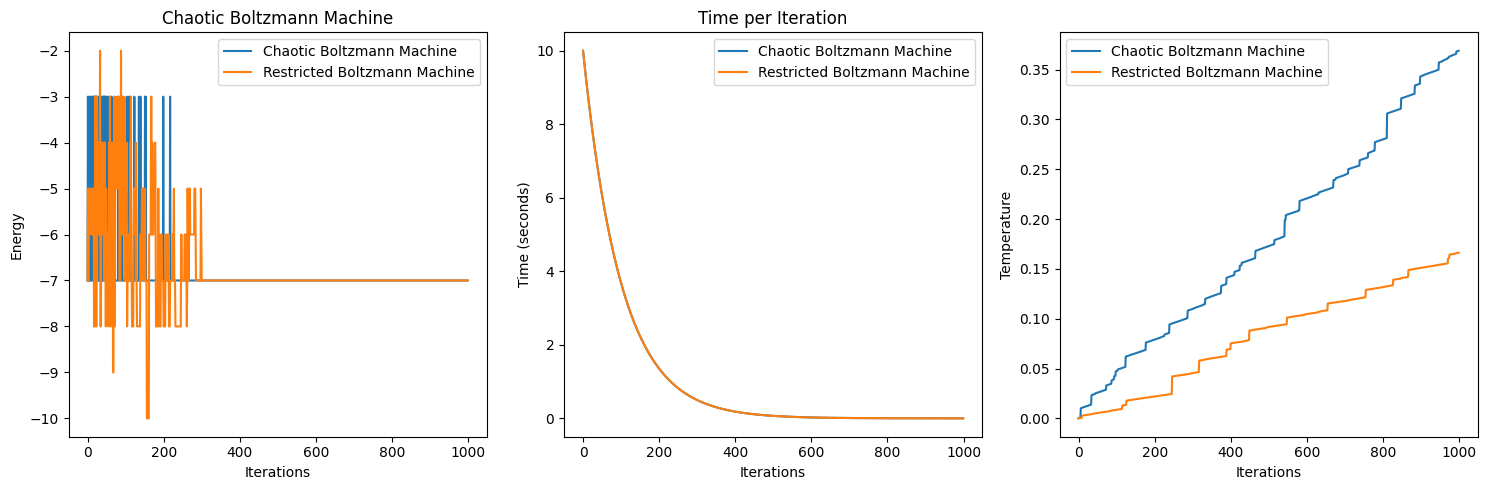

Best State (Chaotic Boltzmann Machine): [1 1 1 1 0 0 1 1 0 1]
Best Energy (Chaotic Boltzmann Machine): -7

Best State (Restricted Boltzmann Machine): [ True  True  True  True  True  True  True  True  True  True]
Best Energy (Restricted Boltzmann Machine): -10


In [ ]:
#stochastic vs chaotic bm

import numpy as np
import time
import matplotlib.pyplot as plt

# Function to calculate energy for a given state
def calculate_energy(state):
    return -np.sum(state)

# Function for chaotic Boltzmann machine state update
def update_state(states, internal_states, T):
    N = len(states)
    for i in range(N):
        # Calculate zi for the ith unit
        zi = np.dot(internal_states, states) - 0.5 * states[i]

        # Update internal state using the differential equation
        dxi_dt = (1 - 2 * states[i]) * (1 + np.exp(-zi / T))
        internal_states[i] += dxi_dt  # Increment by the change

        # Update state si based on xi reaching 0 or 1
        if internal_states[i] >= 1:
            states[i] = 1
            internal_states[i] = 0
        elif internal_states[i] <= 0:
            states[i] = 0
            internal_states[i] = 0
    return states, internal_states


# Restricted Boltzmann Machine (RBM) update
def update_rbm(v, h, W, bv, bh, T):
    prob_h_given_v = 1 / (1 + np.exp(-(np.dot(W, v) + bh) / T))
    h = np.random.rand(len(h)) < prob_h_given_v

    prob_v_given_h = 1 / (1 + np.exp(-(np.dot(W.T, h) + bv) / T))
    v = np.random.rand(len(v)) < prob_v_given_h

    return v, h
# Simulated Annealing algorithm with chaotic Boltzmann machine
def simulated_annealing(initial_state, initial_internal_state, initial_temperature, cooling_rate, iterations):
    current_state = initial_state.copy()
    current_internal_state = initial_internal_state.copy()
    current_energy = calculate_energy(current_state)
    best_state = current_state.copy()
    best_energy = current_energy

    # Metrics
    energies = []
    times = []
    temperatures = []

    start_time = time.time()

    for i in range(iterations):
        temperature = initial_temperature * np.exp(-cooling_rate * i)

        # Update state using chaotic Boltzmann machine
        current_state, current_internal_state = update_state(current_state, current_internal_state, temperature)
        proposed_energy = calculate_energy(current_state)

        # Collect metrics
        energies.append(current_energy)
        times.append(time.time() - start_time)
        temperatures.append(temperature)

        # Decide whether to accept the new state
        if proposed_energy < current_energy or np.random.rand() < np.exp((current_energy - proposed_energy) / temperature):
            current_energy = proposed_energy
            if current_energy < best_energy:
                best_state = current_state.copy()
                best_energy = current_energy

    return best_state, best_energy, energies, times, temperatures

def simulated_annealing_rbm(initial_state, initial_hidden, W, bv, bh, initial_temperature, cooling_rate, iterations):
    current_state = initial_state.copy()
    current_hidden = initial_hidden.copy()
    current_energy = calculate_energy(current_state)
    best_state = current_state.copy()
    best_energy = current_energy

    # Metrics
    energies = []
    times = []
    temperatures = []

    start_time = time.time()

    for i in range(iterations):
        temperature = initial_temperature * np.exp(-cooling_rate * i)

        # Update state using RBM
        current_state, current_hidden = update_rbm(current_state, current_hidden, W, bv, bh, temperature)
        proposed_energy = calculate_energy(current_state)

        # Collect metrics
        energies.append(current_energy)
        times.append(time.time() - start_time)
        temperatures.append(temperature)

        # Decide whether to accept the new state
        if proposed_energy < current_energy or np.random.rand() < np.exp((current_energy - proposed_energy) / temperature):
            current_energy = proposed_energy
            if current_energy < best_energy:
                best_state = current_state.copy()
                best_energy = current_energy

    return best_state, best_energy, energies, times, temperatures




def plot_metrics(energies_cbm, temperatures_cbm, times_cbm,
                 energies_rbm, temperatures_rbm, times_rbm,
                 title_cbm, title_rbm):
    # Plot metrics
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(energies_cbm, label="Chaotic Boltzmann Machine")
    plt.plot(energies_rbm, label="Restricted Boltzmann Machine")
    plt.xlabel("Iterations")
    plt.ylabel("Energy")
    plt.legend()
    plt.title(title_cbm)

    plt.subplot(1, 3, 2)
    plt.plot(times_cbm, label="Chaotic Boltzmann Machine")
    plt.plot(times_rbm, label="Restricted Boltzmann Machine")
    plt.xlabel("Iterations")
    plt.ylabel("Time (seconds)")
    plt.legend()
    plt.title("Time per Iteration")


    plt.subplot(1, 3, 3)
    plt.plot(temperatures_cbm, label="Chaotic Boltzmann Machine")
    plt.plot(temperatures_rbm, label="Restricted Boltzmann Machine")
    plt.xlabel("Iterations")
    plt.ylabel("Temperature")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# Initialize states and parameters
N = 10  # Number of units
initial_state = np.random.randint(0, 2, size=N)
initial_internal_state = np.random.rand(N)
initial_temperature = 10.0
cooling_rate = 0.01
iterations = 1000

# Restricted Boltzmann Machine (RBM)
# Initialize RBM parameters
num_visible = N
num_hidden = 10
W_rbm = np.random.randn(num_visible, num_hidden)
bv_rbm = np.zeros(num_visible)
bh_rbm = np.zeros(num_hidden)

initial_hidden_rbm = np.random.rand(num_hidden)



# Chaotic Boltzmann Machine
best_state_cbm, best_energy_cbm, energies_cbm, temperatures_cbm, times_cbm = simulated_annealing(
    initial_state, initial_internal_state, initial_temperature, cooling_rate, iterations
)

# Restricted Boltzmann Machine (RBM)
best_state_rbm, best_energy_rbm, energies_rbm, temperatures_rbm, times_rbm = simulated_annealing_rbm(
    initial_state, initial_hidden_rbm, W_rbm, bv_rbm, bh_rbm, initial_temperature, cooling_rate, iterations
)

# Plot metrics
plot_metrics(energies_cbm, temperatures_cbm, times_cbm,
             energies_rbm, temperatures_rbm, times_rbm,
             "Chaotic Boltzmann Machine", "Restricted Boltzmann Machine")


# Display best solutions found
print("Best State (Chaotic Boltzmann Machine):", best_state_cbm)
print("Best Energy (Chaotic Boltzmann Machine):", best_energy_cbm)

print("\nBest State (Restricted Boltzmann Machine):", best_state_rbm)
print("Best Energy (Restricted Boltzmann Machine):", best_energy_rbm)



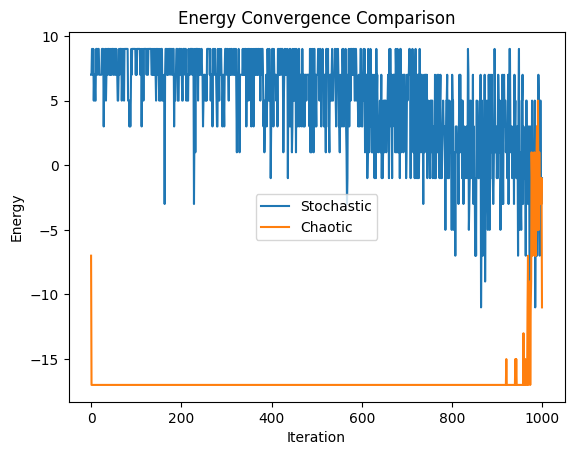

In [ ]:
#maxCut problem

import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

def create_random_graph(num_nodes, seed=None):
    """Create a random graph for demonstration purposes."""
    G = nx.erdos_renyi_graph(num_nodes, 0.3, seed=seed)
    return G

def ising_energy(spins, graph):
    """Calculate the energy of the Ising model."""
    energy = 0
    for edge in graph.edges():
        i, j = edge
        energy -= graph[i][j]['weight'] * spins[i] * spins[j]
    return energy

def update_spin_stochastic(spin, neighbor_spins, beta, chaos_factor=0.0):
    """Update a spin using Stochastic Boltzmann Machine dynamics."""
    total_field = sum(neighbor_spins)
    probability = 1 / (1 + np.exp(-2 * beta * total_field))
    return np.random.choice([-1, 1], p=[probability, 1 - probability])

def update_spin_chaotic(spin, neighbor_spins, beta, chaos_factor=0.1):
    """Update a spin using Chaotic Boltzmann Machine dynamics."""
    total_field = sum(neighbor_spins)
    chaotic_term = chaos_factor * random.uniform(-1, 1)
    new_spin = np.tanh(beta * total_field + chaotic_term)
    return np.sign(new_spin)

def simulated_annealing(graph, beta_schedule, num_steps, update_spin_function, chaos_factor=0.1):
    """Simulated annealing for Maximum Cut with specified update spin function."""
    num_nodes = graph.number_of_nodes()
    spins = np.random.choice([-1, 1], num_nodes)

    best_spins = spins.copy()
    best_energy = ising_energy(best_spins, graph)

    energy_history = []

    for step in range(num_steps):
        beta = beta_schedule(step / num_steps)
        node_order = list(graph.nodes())
        random.shuffle(node_order)

        for node in node_order:
            neighbors = list(graph.neighbors(node))
            neighbor_spins = spins[neighbors]
            spins[node] = update_spin_function(spins[node], neighbor_spins, beta, chaos_factor)

        current_energy = ising_energy(spins, graph)
        energy_history.append(current_energy)

        if current_energy < best_energy:
            best_spins = spins.copy()
            best_energy = current_energy

    return energy_history

def plot_energy_comparison(energy_history_stochastic, energy_history_chaotic):
    """Plot the energy comparison between Stochastic and Chaotic Boltzmann Machine."""
    plt.plot(energy_history_stochastic, label='Stochastic')
    plt.plot(energy_history_chaotic, label='Chaotic')
    plt.title('Energy Convergence Comparison')
    plt.xlabel('Iteration')
    plt.ylabel('Energy')
    plt.legend()
    plt.show()

def main():
    num_nodes = 10
    graph = create_random_graph(num_nodes, seed=42)
    nx.set_edge_attributes(graph, values=1, name='weight')  # Assigning equal weights for simplicity

    # Define the annealing schedule
    def beta_schedule(t):
        return max(0.01, 1.0 - t)

    num_steps = 1000
    chaos_factor = 0.1

    # Stochastic Boltzmann Machine
    energy_history_stochastic = simulated_annealing(graph, beta_schedule, num_steps, update_spin_stochastic)

    # Chaotic Boltzmann Machine
    energy_history_chaotic = simulated_annealing(graph, beta_schedule, num_steps, update_spin_chaotic, chaos_factor)

    # Plot comparison
    plot_energy_comparison(energy_history_stochastic, energy_history_chaotic)

if __name__ == "__main__":
    main()

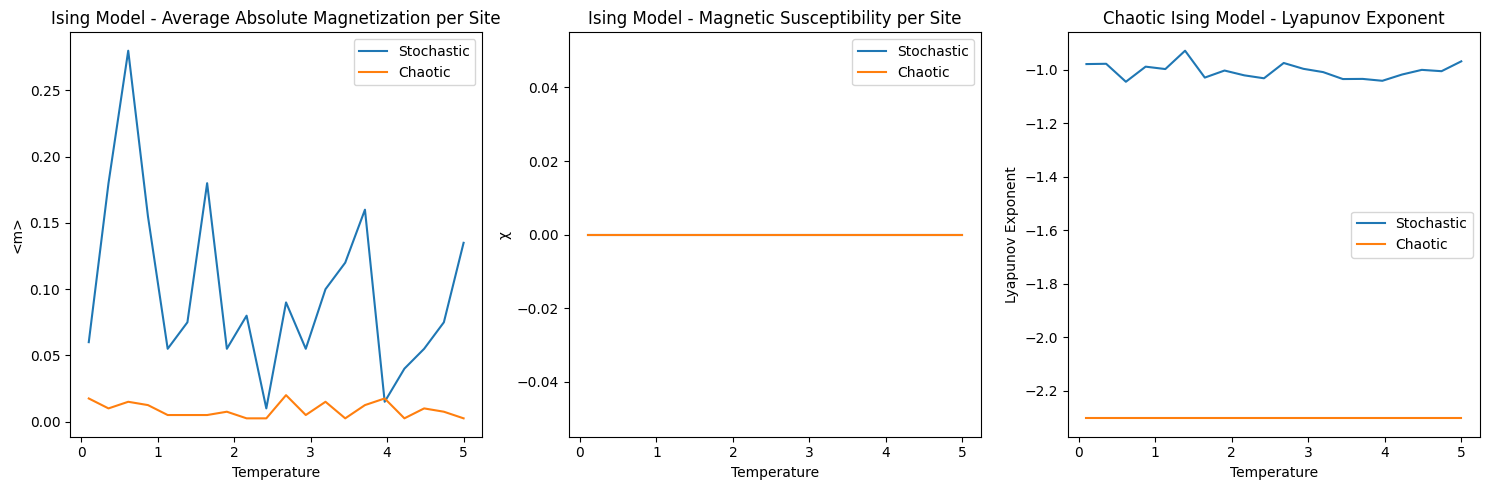

In [ ]:
#ising model second try
import numpy as np
import matplotlib.pyplot as plt

def calculate_magnetization(spins):
    return np.mean(spins)

def calculate_susceptibility(spins, temperature):
    magnetization = calculate_magnetization(spins)
    return np.var(magnetization) / temperature

def calculate_lyapunov_exponent(spins, chaos_strength, num_steps):
    size = spins.shape[0]
    lyapunov_sum = 0.0

    for step in range(num_steps):
        update_spins_chaotic(spins, chaos_strength)

        magnetization = calculate_magnetization(spins)
        lyapunov_sum += np.log(np.abs(chaos_strength * np.random.choice([-1, 1])))

    return lyapunov_sum / num_steps



def initialize_system(size):
    return 2 * np.random.randint(2, size=(size, size)) - 1

def update_spins_stochastic(spins, temperature):
    """Update a spin using Stochastic Boltzmann Machine dynamics."""
    size = spins.shape[0]
    i, j = np.random.randint(0, size, size=2)

    delta_energy = 2 * spins[i, j] * (
        spins[(i + 1) % size, j] +
        spins[i - 1, j] +
        spins[i, (j + 1) % size] +
        spins[i, j - 1]
    )

    if np.random.rand() < np.exp(-delta_energy / temperature):
        spins[i, j] *= -1

def update_spins_chaotic(spins, chaos_strength):
    """Update a spin using Chaotic Boltzmann Machine dynamics."""
    size = spins.shape[0]
    i, j = np.random.randint(0, size, size=2)

    spins[i, j] *= chaos_strength * np.random.choice([-1, 1])

def simulate_stochastic_ising_model(size, temperature_range, num_steps):
    """Simulation of Ising model with stochastic update spin function."""
    magnetization_values = []
    susceptibility_values = []
    lyapunov_exponents = []

    for temperature in temperature_range:
        spins = initialize_system(size)
        lyapunov_sum = 0.0
        for step in range(num_steps):
            update_spins_stochastic(spins, temperature)
            lyapunov_sum += np.log(np.random.rand())

        magnetization = calculate_magnetization(spins)
        magnetization_values.append(np.abs(magnetization))

        susceptibility = calculate_susceptibility(spins, temperature)
        susceptibility_values.append(susceptibility)

        lyapunov_exponent = lyapunov_sum / num_steps
        lyapunov_exponents.append(lyapunov_exponent)

    return magnetization_values, susceptibility_values, lyapunov_exponents


def simulate_chaotic_ising_model(size, chaos_strength, temperature_range, num_steps):
    """Simulation of Ising model with chaotic update spin function."""
    magnetization_values = []
    susceptibility_values = []
    lyapunov_exponents = []

    for temperature in temperature_range:
        spins = initialize_system(size)
        lyapunov_sum = 0.0
        for step in range(num_steps):
            update_spins_chaotic(spins, chaos_strength)
            lyapunov_sum += np.log(np.abs(chaos_strength * np.random.choice([-1, 1])))

        magnetization = calculate_magnetization(spins)
        magnetization_values.append(np.abs(magnetization))

        susceptibility = calculate_susceptibility(spins, temperature)
        susceptibility_values.append(susceptibility)

        lyapunov_exponent = lyapunov_sum / num_steps
        lyapunov_exponents.append(lyapunov_exponent)

    return magnetization_values, susceptibility_values, lyapunov_exponents


# Set parameters
size = 20
num_steps = 1000
temperature_range = np.linspace(0.1, 5.0, 20)  # Adjust the temperature range
chaos_strength = 0.1

# Run simulation for stochastic model
magnetization_values_stochastic, susceptibility_values_stochastic, lyapunov_exponents_stochastic = simulate_stochastic_ising_model(size, temperature_range, num_steps)
# Run simulation for chaotic model
magnetization_values_chaotic, susceptibility_values_chaotic, lyapunov_exponents_chaotic = simulate_chaotic_ising_model(size, chaos_strength, temperature_range, num_steps)

# Plot results for stochastic model
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(temperature_range, magnetization_values_stochastic, label="Stochastic")
plt.plot(temperature_range, magnetization_values_chaotic, label="Chaotic")
plt.title('Ising Model - Average Absolute Magnetization per Site')
plt.xlabel('Temperature')
plt.ylabel('<m>')
plt.legend()

plt.subplot(132)
plt.plot(temperature_range, susceptibility_values_stochastic, label="Stochastic")
plt.plot(temperature_range, susceptibility_values_chaotic, label="Chaotic")
plt.title('Ising Model - Magnetic Susceptibility per Site')
plt.xlabel('Temperature')
plt.ylabel('χ')
plt.legend()


# Plot Lyapunov exponent over temperature
plt.subplot(133)
plt.plot(temperature_range, lyapunov_exponents_stochastic, label="Stochastic")
plt.plot(temperature_range, lyapunov_exponents_chaotic, label="Chaotic")
plt.title('Chaotic Ising Model - Lyapunov Exponent')
plt.xlabel('Temperature')
plt.ylabel('Lyapunov Exponent')
plt.legend()
plt.tight_layout()
plt.show()